## Importing necessary Libraries for EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns

## Reading the data from csv file

In [3]:
data = pd.read_csv('chatgpt_reviews.csv')

## Printing the first five rows of dataset

In [4]:
data.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


## Checking the shape of the dataset

In [5]:
data.shape

(196727, 4)

## Checking for missing values

In [6]:
data.isna().sum()

,0
Review Id,0
Review,6
Ratings,0
Review Date,0


## So we can see there are six missing values in the column Review

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


## Handling missing values

In [8]:
data['Review'] = data['Review'].astype(str).fillna('')

## Adding a new column 'Sentiment' using textbob

In [9]:
from textblob import TextBlob

def get_sent(text):
  sentiment = TextBlob(text).sentiment.polarity
  if sentiment > 0:
    return 'Positive'
  elif sentiment < 0:
    return 'Negative'
  else:
    return 'Neutral'

data['Sentiment'] = data['Review'].apply(get_sent)

sent_dist = data['Sentiment'].value_counts()

## Plotting the distribution of Reviews Count

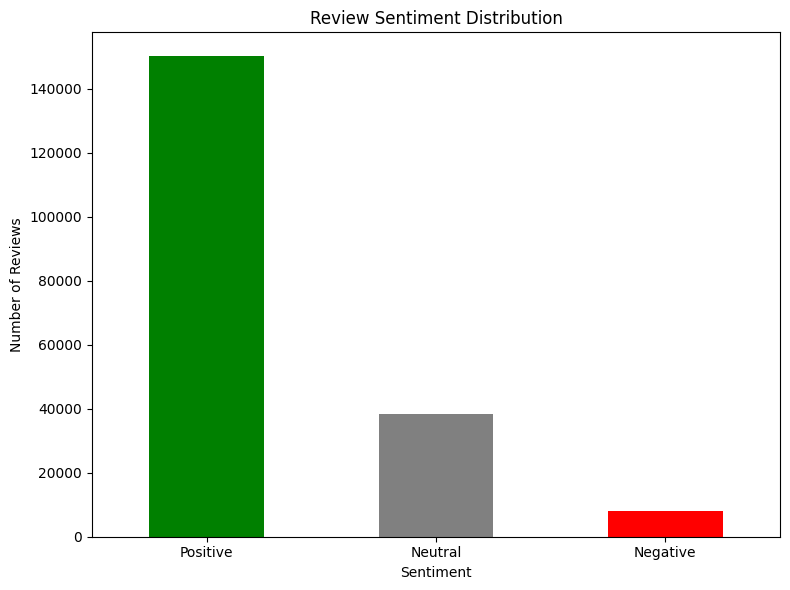

In [10]:
plt.figure(figsize=(8, 6))
colors = ['green', 'gray', 'red']
sent_dist.plot(kind='bar', color=colors)
plt.title('Review Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

In [11]:
data.head()

,Review Id,Review,Ratings,Review Date,Sentiment
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,Positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,Positive
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,Positive
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,Positive
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,Positive


## Extracting Postitive reviews

In [12]:
positive_reviews = data[data['Sentiment'] == 'Positive']['Review']

vectorizer = CountVectorizer(ngram_range=(2,3), stop_words='english' , max_features = 100)

x = vectorizer.fit_transform(positive_reviews)

## Counting the frequency of each phrase

In [13]:
phrase_counts = x.sum(axis = 0)
phrases = vectorizer.get_feature_names_out()
phrase_freq = [(phrases[i], phrase_counts[0, i]) for i in range(len(phrases))]

## Creating a dataframe for word phrases and frequency

In [14]:
phrase_freq = sorted(phrase_freq, key=lambda x: x[1], reverse=True)

phrase_df = pd.DataFrame(phrase_freq, columns=['Phrase', 'Frequency'])

## Plotting Most common Phrases in Positive Reviews

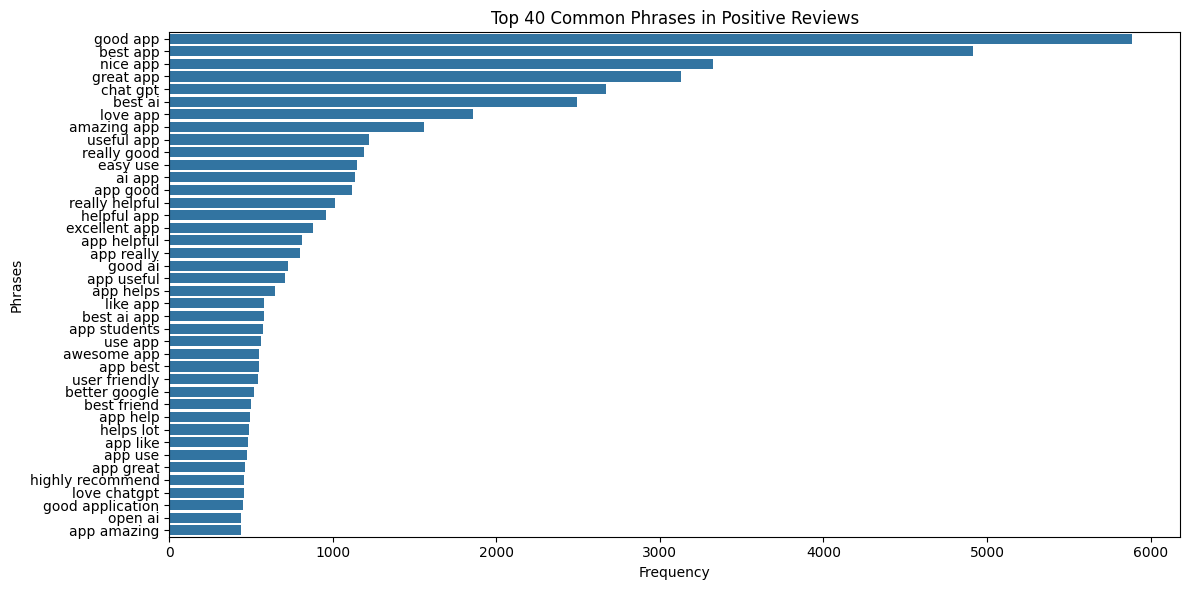

In [15]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Phrase', data=phrase_df.head(40))  # Show top 10 phrases
plt.title('Top 40 Common Phrases in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Phrases')
plt.tight_layout()
plt.show()

### So the visualization highlights that the users are appreciating 'ChatGPT' with some words like 'good app', 'best app', 'nice app' and etc.  Users also find the app as amazing app, best ai and highly recommended.

In [16]:
negative_reviews = data[data['Sentiment'] == 'Negative']['Review']

x_neg = vectorizer.fit_transform(negative_reviews)

In [17]:
neg_phrase_counts = x_neg.sum(axis = 0)
neg_phrases = vectorizer.get_feature_names_out(negative_reviews)
neg_phrase_freq = [(neg_phrases[i], neg_phrase_counts[0, i]) for i in range(len(neg_phrases ))]

In [18]:
neg_phrase_freq = sorted(neg_phrase_freq, key=lambda x: x[1], reverse=True)

neg_phrase_df = pd.DataFrame(neg_phrase_freq, columns=['Phrase', 'Frequency'])

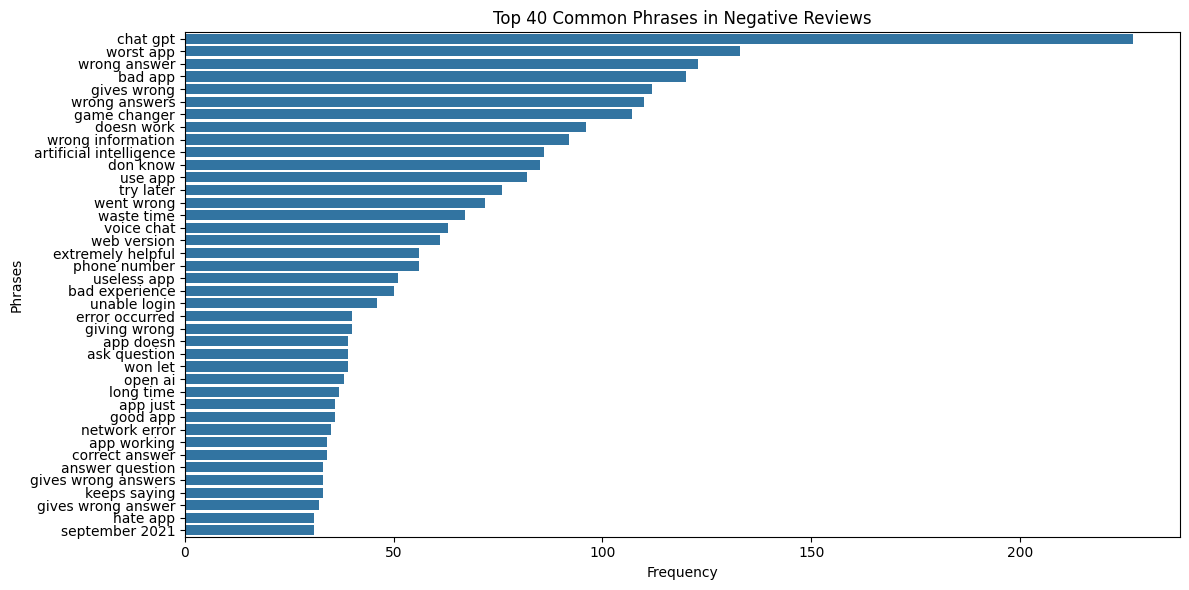

In [19]:
# Plotting Most common Phrases in Negative Reviews
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Phrase', data=neg_phrase_df.head(40))  # Show top 40 phrases
plt.title('Top 40 Common Phrases in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Phrases')
plt.tight_layout()
plt.show()

* We exclude the term "chat gpt" from negative reviews since it's expected that users will frequently mention the app's name in their feedback.



### This visualization shows that user's main complaints about ChatGPT includes as 'worst app', 'wrong answer' and 'wrong answer', with issues as 'dosent work' frequently  mentioned  in negative reviews. The users also express frustration regarding the app saying that it doesnt work or network error.

### Common Problems Faced by Users in ChatGPT

In [20]:
# grouping similar phrases into broader problem categories
problem_keywords = {
    'Incorrect Answers': ['wrong answer', 'gives wrong', 'incorrect', 'inaccurate', 'wrong'],
    'App Performance': ['slow', 'lag', 'crash', 'bug', 'freeze', 'loading', 'glitch', 'worst app', 'bad app', 'horrible', 'terrible'],
    'User Interface': ['interface', 'UI', 'difficult to use', 'confusing', 'layout'],
    'Features Missing/Not Working': ['feature missing', 'not working', 'missing', 'broken', 'not available'],
    'Quality of Responses': ['bad response', 'useless', 'poor quality', 'irrelevant', 'nonsense']
}

problem_count = {problem: 0 for problem in problem_keywords}

for phrase, count in neg_phrase_freq:
  for problem, keyboard in problem_keywords.items():
    if any(keyword in phrase for keyword in keyboard):
      problem_count[problem] += count
      break

problem_df = pd.DataFrame(list(problem_count.items()), columns=['Problem', 'Count'])

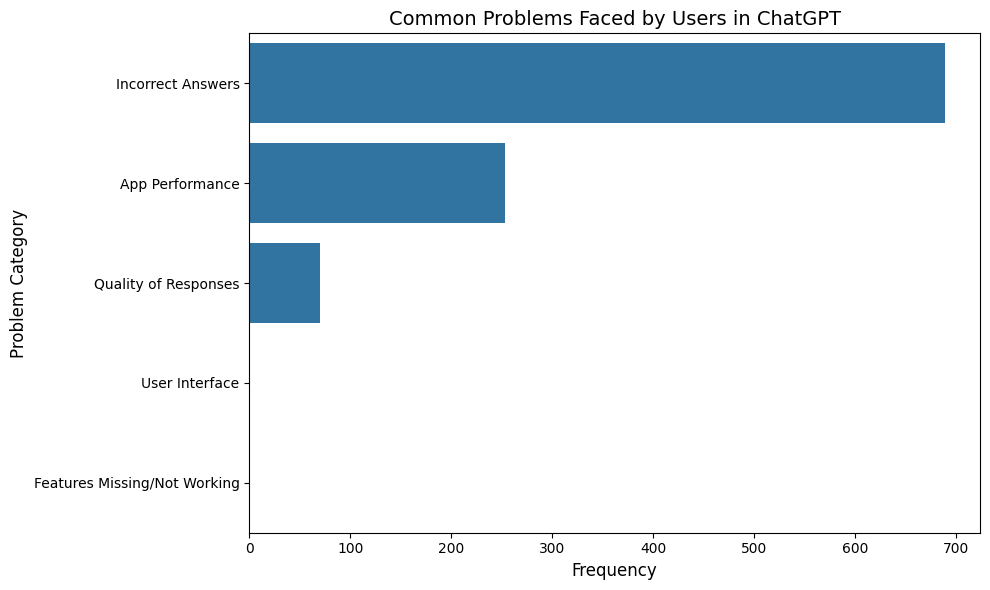

In [25]:
# Sort the DataFrame in descending order
problem_count = problem_df.sort_values(by='Count', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y='Problem', x='Count', data=problem_count, orient='h')

# Titles and labels
plt.title('Common Problems Faced by Users in ChatGPT', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Problem Category', fontsize=12)

plt.tight_layout()
plt.show()

### The visualization indicates that users mostly experienced is 'incorrect answers' by ChatGPT. Other noticable problem include 'App performance' which maybe user experinced during working with ChatGPT.

### These findings suggest areas where improvements could be made to enhance the user experience with ChatGPT.

# Analyzing How Reviews Changed Over Time

In [29]:
data['Review Date'] = pd.to_datetime(data['Review Date'])

sentiment_over_time = data.groupby([data['Review Date'].dt.to_period('M'), 'Sentiment']).size().unstack(fill_value=0)

In [30]:
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()

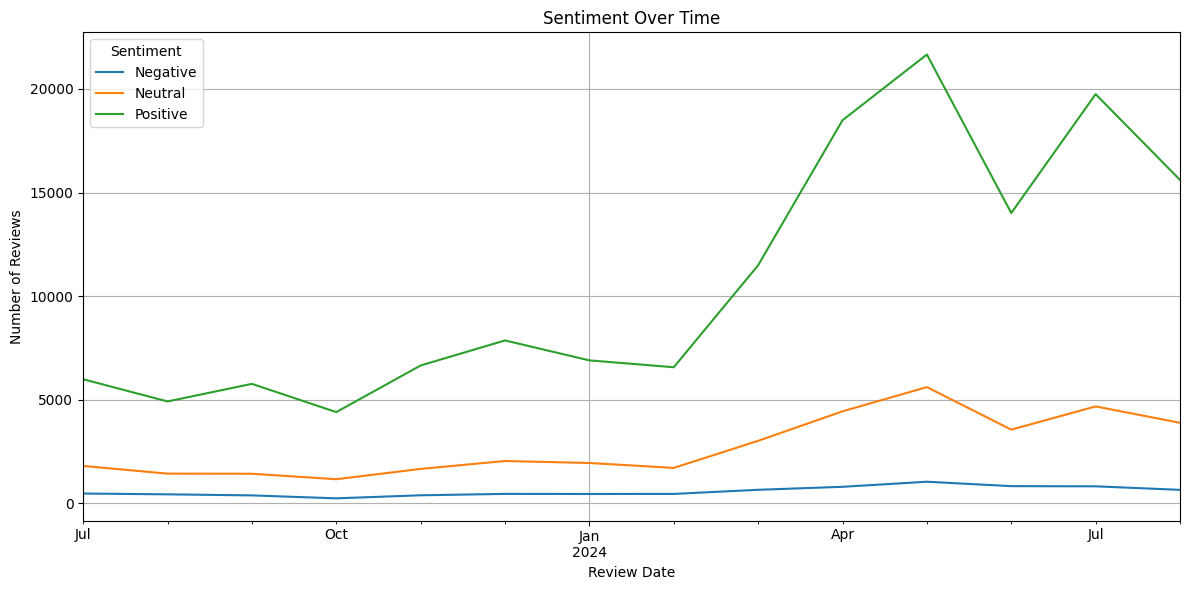

In [31]:
# Analyzing How Reviews Changed Over Time (Corrected Plotting)
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(ax=plt.gca())  # Use the current axes for plotting
plt.title('Sentiment Over Time')
plt.xlabel('Review Date')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()


####The chart shows that positive reviews for ChatGPT (green line) have mostly increased over time. There was a big jump in March 2024, peaking in May, before slightly dropping in July.  

####Neutral reviews (grey line) also grew steadily, with a noticeable peak in May 2024.  

####Negative reviews (red line) have stayed low and stable, meaning that while more people are sharing their opinions, overall feedback remains mostly positive with only a small rise in negative comments.

#Analyzing How Often Users Promote ChatGPT

To wrap up the ChatGPT review analysis, let's look at how often users recommend it. We'll use the **Net Promoter Score (NPS)**, a common metric for measuring customer satisfaction and loyalty.  

NPS is based on a simple question: **"How likely are you to recommend our product to a friend or colleague?"** (rated from 0 to 10). Here's how it's calculated:  

- **Promoters (9-10):** Highly satisfied users who actively recommend the product.  
- **Passives (7-8):** Neutral users who like the product but don’t strongly promote it.  
- **Detractors (0-6):** Users who are dissatisfied and unlikely to recommend it.  

**NPS Formula:**  
**NPS = % of Promoters − % of Detractors**  

Since we have star ratings instead of direct NPS scores, we'll assume:  
- **5 stars = Promoters**  
- **4 stars = Passives**  
- **3 stars or below = Detractors**  

Now, let’s calculate the NPS based on this approach!

In [34]:
data['NPS Category'] = data['Ratings'].apply(lambda x: 'Promoter' if x >= 5 else ('Passive' if x >= 4 else 'Detractor'))

count_nps = data['NPS Category'].value_counts(normalize=True) * 100

score_nps = count_nps.get('Promoter', 0) - count_nps.get('Detractor', 0)

score_nps

64.35313912172705

The **Net Promoter Score (NPS)** for ChatGPT, based on the ratings in the dataset, is **approximately 64.35**. This suggests that most users are happy with ChatGPT and would recommend it to others. Since an NPS above **50** is considered excellent, this indicates strong user satisfaction and loyalty.